In [24]:
using Plots
using Combinatorics
using LinearAlgebra

In [2]:
n_particles=400
r=rand(2,n_particles)
ixr=r[1,:].>0.5
ixl=r[1,:].<=0.5
r

2×400 Matrix{Float64}:
 0.616749  0.811909  0.690384  0.507917  …  0.899722  0.0298417  0.143989
 0.528931  0.143286  0.512117  0.992023     0.026933  0.674336   0.979502

In [3]:
ids=range(1,n_particles)

1:400

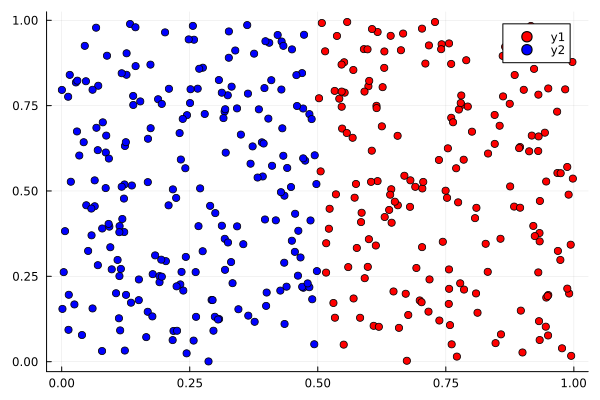

In [4]:
plot(r[1,:][ixr],r[2,:][ixr],seriestype=:scatter,mc=:red)
plot!(r[1,:][ixl],r[2,:][ixl],seriestype=:scatter,mc=:blue)

In [5]:
v=zeros(2,n_particles)
v[1,r[1,:].<=0.5].=500
v[1,r[1,:].>0.5].=-500

184-element view(::Matrix{Float64}, 1, [1, 2, 3, 4, 7, 8, 9, 10, 12, 14  …  379, 380, 383, 386, 387, 388, 390, 394, 395, 398]) with eltype Float64:
 -500.0
 -500.0
 -500.0
 -500.0
 -500.0
 -500.0
 -500.0
 -500.0
 -500.0
 -500.0
    ⋮
 -500.0
 -500.0
 -500.0
 -500.0
 -500.0
 -500.0
 -500.0
 -500.0
 -500.0

In [6]:
ids_pairs=pairs=vcat([x' for x in collect(Combinatorics.combinations(ids,2))]...)
x_pairs=pairs=vcat([x' for x in collect(Combinatorics.combinations(r[1,:],2))]...)
y_pairs=vcat([x' for x in collect(Combinatorics.combinations(r[2,:],2))]...)
dx_pairs=diff(x_pairs,dims=2)
dy_pairs=diff(y_pairs,dims=2)
d_pairs=sqrt.(dx_pairs.^2 + dy_pairs.^2)

79800×1 Matrix{Float64}:
 0.43221491075718077
 0.07553059546950332
 0.47570874080907016
 0.5633669844924217
 0.4693864492644433
 0.08976803950104977
 0.28826419718541907
 0.06412733378801193
 0.47918817458218493
 0.3304272299937782
 ⋮
 0.7384217656013513
 0.45646846524748513
 0.7323360722246617
 0.46571185528492015
 0.6332220890757829
 0.8221623948843075
 1.0843529375476557
 1.2159438732578005
 0.3258164225693573

In [7]:
x=ids_pairs[4,:]'

x

1×2 adjoint(::Vector{Int64}) with eltype Int64:
 1  5

In [50]:
radius=0.06
a=d_pairs .< 2*radius
indices = findall(a)

3281-element Vector{CartesianIndex{2}}:
 CartesianIndex(2, 1)
 CartesianIndex(6, 1)
 CartesianIndex(8, 1)
 CartesianIndex(35, 1)
 CartesianIndex(73, 1)
 CartesianIndex(117, 1)
 CartesianIndex(136, 1)
 CartesianIndex(187, 1)
 CartesianIndex(190, 1)
 CartesianIndex(211, 1)
 ⋮
 CartesianIndex(79638, 1)
 CartesianIndex(79659, 1)
 CartesianIndex(79669, 1)
 CartesianIndex(79676, 1)
 CartesianIndex(79692, 1)
 CartesianIndex(79712, 1)
 CartesianIndex(79720, 1)
 CartesianIndex(79741, 1)
 CartesianIndex(79753, 1)

In [55]:
a=BitMatrix([1,0,1,1,])
a_2d=reshape(a,(length(a),1))
matrix=[1 2;3 4;5 6;7 8;9 0]

indices=findall(a_2d)
indices

DimensionMismatch: DimensionMismatch: cannot create a BitMatrix from a 1-dimensional iterator

In [25]:
id_pairs_collide[1]

2-element Vector{Int64}:
  1
 36

In [24]:
v1=v[1,id_pairs_collide[:,1]]
#v2=v[:;id_pairs_collide[:,2]]
#r1=r[:,id_pairs_collide[:,1]]
#r2=r[:,id_pairs_collide[:,1]]

ArgumentError: ArgumentError: invalid index: [[1, 54], [1, 100], [1, 136], [1, 154], [1, 160], [1, 177], [1, 210], [1, 253], [1, 296], [1, 298]  …  [380, 397], [381, 394], [383, 391], [384, 393], [385, 386], [385, 397], [386, 397], [387, 394], [392, 398], [395, 400]] of type Vector{Vector{Int64}}

In [29]:
id_pairs_collide[:,]


3083-element Vector{Vector{Int64}}:
 [1, 54]
 [1, 100]
 [1, 136]
 [1, 154]
 [1, 160]
 [1, 177]
 [1, 210]
 [1, 253]
 [1, 296]
 [1, 298]
 ⋮
 [381, 394]
 [383, 391]
 [384, 393]
 [385, 386]
 [385, 397]
 [386, 397]
 [387, 394]
 [392, 398]
 [395, 400]